In [2]:
import numpy as np
import pandas as pd 
import xarray as xr
import netCDF4 as nc
# in terminal/console enter:
# conda install -c conda-forge erddap-python
from erddapClient import ERDDAP_Server
import time #measuring response time / dev
import urllib.request #for building request urls

#tutorial from https://k-rns.github.io/workshop_data_reuse/03_dataset_locally_api/index.html
#https://github.com/oceanwatch/python-satellite-course/blob/master/OW_tutorial2.ipynb
#https://github.com/hmedrano/erddap-python

#for plotting 2023-01-17
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 

#for converting obj cols to datetime cols 
import datetime as dt

#learning more abt erddapClient from erddap-python
from erddapClient import ERDDAP_Tabledap

In [3]:
start = time.perf_counter()
remoteServer1 = ERDDAP_Server('https://coastwatch.pfeg.noaa.gov/erddap')
remoteServer = ERDDAP_Server('https://erddap.dataexplorer.oceanobservatories.org/erddap/')
print(remoteServer)
request_time = time.perf_counter() - start
#something seems to stall here and it only prints Server version when I abort run
print("response time is:",request_time)
#taking between 0.001s and 75s for coastalwatch... something hinky
#for ooi it is ok

<erddapClient.ERDDAP_Server>
Server version:  ERDDAP_version=2.02
response time is: 0.6538895529999991


In [4]:
start = time.perf_counter()
searchRequest1 = remoteServer1.search(searchFor="gliders")
searchRequest = remoteServer.search(searchFor="ooi") 
#search attribute/method doesn't seem to work for ooi erddap

request_time = time.perf_counter() - start
print(searchRequest)
print("response time is:",request_time)
#ok timing is not an issue?

IndexError: list index out of range

In [29]:
#building URL function? rerddap has this
#base_url = ""

In [5]:
save_as = "test_erddap_retrieval.csv"
download_url = "http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.csv?time%2Cz%2Cspectir_412nm%2Cspectir_443nm%2Cspectir_490nm%2Cspectir_510nm%2Cspectir_555nm&time%3E=2022-09-24T07%3A53%3A00Z"
urllib.request.urlretrieve(download_url, save_as)

('test_erddap_retrieval.csv', <http.client.HTTPMessage at 0x7fc0344ca8e0>)

In [6]:
pd.read_csv("test_erddap_retrieval.csv")

testdf = pd.read_csv ("test_erddap_retrieval.csv", dtype='unicode') #,parse_dates=True ,header=[0,1]
#ideally this read_csv would include arg header = [0,1] but that messes up plotting (too much metadata?)
testdf.columns
#testdf["time"]
#print(testdf.dtypes)


Index(['time', 'z', 'spectir_412nm', 'spectir_443nm', 'spectir_490nm',
       'spectir_510nm', 'spectir_555nm'],
      dtype='object')

In [7]:
#THIS CELL IS IRRELEVANT

#changing 'time' col from object to datetime
#with pd.read_csv arg header=[0,1]
testdf['time'].astype(str)
#testdf['time2'] = pd.to_datetime(testdf['time']) 
#print(testdf.iloc[0])
#print(testdf.dtypes)
testdfcol = dt.datetime.strptime("2022-09-24T19:48:00Z","%Y-%m-%dT%H:%M:%SZ")
testdfcol2 = dt.datetime.strptime(str(testdf['time'].iloc[1]),"%Y-%m-%dT%H:%M:%SZ")

print("time col is dtype:",testdf['time'].dtypes)
print(testdfcol2, type(testdfcol2))

time col is dtype: object
2022-09-24 19:48:00 <class 'datetime.datetime'>


In [139]:
#getting rid of second row bc multi index is not useful
#cell 2 up for including 2nd row in header didn't work
testdf.iloc[1]
testdf['time'].iloc[0]
testdf= testdf.drop(0)
testdf #now doesn't have 2nd row as multi index

,time,z,spectir_412nm,spectir_443nm,spectir_490nm,spectir_510nm,spectir_555nm
1,2022-09-24T19:48:00Z,-20.0,0.0101908807,-0.0025727758,0.0098438424,0.01055782,0.0105658025
2,2022-09-24T19:49:00Z,-20.0,0.0110217111,-0.0024225046,0.0095202022,0.0107170864,0.0132538303
3,2022-09-24T19:49:00Z,-19.0,0.0107561938,-0.0019058382,0.0109337775,0.0102653392,0.0173130681
4,2022-09-24T19:49:00Z,-18.0,0.01015056,-9.782131E-4,0.0106998298,0.0116734288,0.0241834617
5,2022-09-24T19:49:00Z,-17.0,0.010153518,-0.0013806467,0.0110340758,0.0134186811,0.0360242548
...,...,...,...,...,...,...,...
61,2022-09-27T07:53:00Z,-5.0,0.0109890935,-0.0027848665,0.0109971116,0.0077280552,-0.0063751821
62,2022-09-27T07:53:00Z,-4.0,0.0106302893,-0.0027379761,0.0109159642,0.0078050457,-0.00624226
63,2022-09-27T07:53:00Z,-3.0,0.010466492,-0.0025219919,0.0104474309,0.007653692,-0.0071475097
64,2022-09-27T07:53:00Z,-2.0,0.0102009981,-0.0024456031,0.0102589015,0.0077795183,-0.0065561451


In [153]:
#THIS CELL IS IRRELEVANT

#making sure dtypes/str s are correct for plotting: want datetime
testdf["time"]
#yikes lets convert to datetime
testdf['time'] = pd.to_datetime(testdf['time'])
print(testdf.dtypes) #datetime-ification looks good here

time             datetime64[ns, UTC]
z                            float64
spectir_412nm                float64
spectir_443nm                float64
spectir_490nm                float64
spectir_510nm                float64
spectir_555nm                float64
dtype: object


In [154]:
#THIS CELL IS IRRELEVANT

#now to make the objects all floats in the rest of the cols
testdf.iloc[1] #they are confirmed to be objects

#for one column by name
testdf['z'] = testdf['z'].astype(float)
print(testdf.dtypes)

#for all columns except specified "time"
cols = testdf.columns.drop('time')
testdf[cols] = testdf[cols].apply(pd.to_numeric) #errors='coerce' addtl arg if necessary

#slay

time             datetime64[ns, UTC]
z                            float64
spectir_412nm                float64
spectir_443nm                float64
spectir_490nm                float64
spectir_510nm                float64
spectir_555nm                float64
dtype: object


Line graph: 


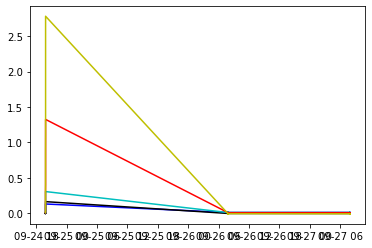

<Figure size 1080x288 with 0 Axes>

Scatter Plot:  


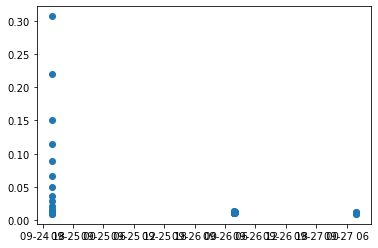

In [162]:
#plotting pd df with matplotlib

# plotting a line graph
print("Line graph: ")
plt.plot(testdf["time"], testdf["spectir_412nm"],"-b")
plt.plot(testdf["time"], testdf["spectir_443nm"],"-k")
plt.plot(testdf["time"], testdf["spectir_490nm"],"-c")
plt.plot(testdf["time"], testdf["spectir_510nm"],"-r")
plt.plot(testdf["time"], testdf["spectir_555nm"],"-y")



plt.figure().set_figwidth(15)

plt.show()
  
# plotting a scatter plot
print("Scatter Plot:  ")
plt.scatter(testdf["time"], testdf["spectir_490nm"])
plt.show()





In [6]:
'''
2023-01-17
Following tutorial: Comparison of chlorophyll data from different sensors
from https://github.com/oceanwatch/python-satellite-course/blob/master/OW_tutorial2.ipynb
'''
url='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/sw_chla_monthly_2018_0.nc?chlor_a[(1997-10-16T12:00:00Z):1:(2010-10-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url, "sw.nc")

('sw.nc', <http.client.HTTPMessage at 0x7fe6671dcd00>)

In [29]:
sw_ds = xr.open_dataset('sw.nc',decode_cf=False)

In [9]:
sw_ds.data_vars
sw_ds.chlor_a.shape

(153, 121, 121)

In [34]:
sw_ds.time.units

'seconds since 1970-01-01T00:00:00Z'

In [30]:
swAVG=np.mean(sw_ds.chlor_a,axis=(1,2))

swdates=nc.num2date(sw_ds.time,sw_ds.time.units) 

In [31]:
sw_ds.close()

In [14]:
# now using modis satellite
url2='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/aqua_chla_monthly_2018_0.nc?chlor_a[(2002-07-16T12:00:00Z):1:(2019-12-16T12:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url2, "aq.nc")

('aq.nc', <http.client.HTTPMessage at 0x7fe6672076d0>)

In [35]:
aq_ds = xr.open_dataset('aq.nc',decode_cf=False)
aqAVG=np.mean(aq_ds.chlor_a,axis=(1,2))

aqdates=nc.num2date(aq_ds.time,aq_ds.time.units)


In [18]:
aq_ds.chlor_a.shape

(210, 241, 241)

In [36]:
aq_ds.close()

In [20]:
#now for monthly VIIRS data
url3='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/noaa_snpp_chla_monthly.nc?chlor_a[(2012-01-02T12:00:00Z):1:(2019-12-01T12:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url3, "snpp.nc")

('snpp.nc', <http.client.HTTPMessage at 0x7fe6526168b0>)

In [37]:
snpp_ds = xr.open_dataset('snpp.nc',decode_cf=False)
#taking monthly mean
snppAVG=np.mean(snpp_ds.chlor_a,axis=(1,2))

snppdates=nc.num2date(snpp_ds.time,snpp_ds.time.units) 

In [38]:
snpp_ds.close()

In [23]:
#keeping going w the tutorial: hope to get a chart
url4='https://oceanwatch.pifsc.noaa.gov/erddap/griddap/esa-cci-chla-monthly-v4-2.nc?chlor_a[(1997-09-04):1:(2019-12-01T00:00:00Z)][(25):1:(15)][(198):1:(208)]'
urllib.request.urlretrieve(url4, "cci.nc")

('cci.nc', <http.client.HTTPMessage at 0x7fe652607190>)

In [39]:
cci_ds = xr.open_dataset('cci.nc',decode_cf=False)
cciAVG=np.mean(cci_ds.chlor_a,axis=(1,2))
ccidates=nc.num2date(cci_ds.time,cci_ds.time.units) 

In [40]:
cci_ds.close()

TypeError: float() argument must be a string or a number, not 'cftime._cftime.DatetimeGregorian'

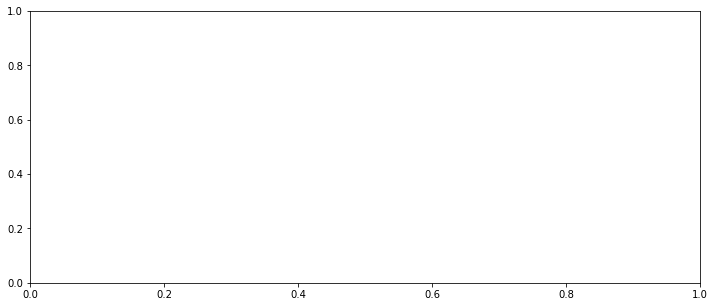

In [41]:
plt.figure(figsize=(12,5)) 
plt.plot(swdates,swAVG,label='sw',c='red',marker='.',linestyle='-')
plt.plot(aqdates,aqAVG,label='aq',c='blue',marker='.',linestyle='-')
plt.plot(snppdates,snppAVG,label='snpp',c='green',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

In [19]:
"""
plt.figure(figsize=(12,5)) 
plt.plot(ccidates,cciAVG, label='cci',c='black')
plt.scatter(swdates,swAVG,label='sw',c='red')
plt.scatter(aqdates,aqAVG,label='aq',c='blue')
plt.scatter(snppdates,snppAVG,label='snpp',c='green')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()
"""

"\nplt.figure(figsize=(12,5)) \nplt.plot(ccidates,cciAVG, label='cci',c='black')\nplt.scatter(swdates,swAVG,label='sw',c='red')\nplt.scatter(aqdates,aqAVG,label='aq',c='blue')\nplt.scatter(snppdates,snppAVG,label='snpp',c='green')\nplt.ylabel('Chl-a (mg/m^3)')\nplt.legend()\n"

In [25]:
remote = ERDDAP_Tabledap('https://coastwatch.pfeg.noaa.gov/erddap', 'cwwcNDBCMet')
test_remote = ERDDAP_Tabledap('http://erddap.dataexplorer.oceanobservatories.org/erddap','ooi-ce01issp-sp001-07-spkirj000')
test_remote.setResultVariables(['time','z'])
print(test_remote.getURL('htmlTable'))

responseCSV = (
    remote.setResultVariables(['station','time','atmp'])
            .addConstraint('time>=2020-12-29T00:00:00Z')
            .addConstraint('time<=2020-12-31T00:00:00Z')
            .orderByClosest(['station','time/1day'])
            .getDataFrame()
)
print(responseCSV)
print(test_remote)

http://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/ooi-ce01issp-sp001-07-spkirj000.htmlTable?time%2Cz
     station            time (UTC)  atmp (degree_C)
0      41001  2020-12-29T00:00:00Z             17.3
1      41001  2020-12-30T00:00:00Z             13.7
2      41001  2020-12-31T00:00:00Z             15.9
3      41004  2020-12-29T00:00:00Z             18.2
4      41004  2020-12-30T00:00:00Z             17.1
...      ...                   ...              ...
2009   YKRV2  2020-12-30T00:00:00Z              NaN
2010   YKRV2  2020-12-31T00:00:00Z              8.1
2011   YKTV2  2020-12-29T00:00:00Z             11.3
2012   YKTV2  2020-12-30T00:00:00Z              NaN
2013   YKTV2  2020-12-31T00:00:00Z              7.1

[2014 rows x 3 columns]
<erddapClient.ERDDAP_Tabledap>
Title:       Coastal Endurance: Oregon Inshore Surface Piercing Profiler Mooring: Surface Piercing Profiler: Spectral Irradiance
Server URL:  http://erddap.dataexplorer.oceanobservatories.org/erddap
Data